In [222]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from dcFBA.DynamicModels import DynamicParallelFBA

from ecoli_models import (
    get_leucine_knock_out_model,
    get_lysine_knock_out_model,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
leucine_knock_out = get_leucine_knock_out_model()
lysine_knock_out = get_lysine_knock_out_model()

getState1
Model clone time: 2.441833019256592
getState1
Model clone time: 2.171211004257202


djFBA totally unconstrained results in nothing. If we set the minimal constraint of no uptake of lysine by dleu and no uptake of leucine in dlys than we get some results

In [224]:
#Set creation of the metabolites to zero
leucine_knock_out.getReaction("R_IPPS").setUpperBound(0)
lysine_knock_out.getReaction("R_DAPDC").setUpperBound(0)


leucine_knock_out.getReaction("R_LYStex").setLowerBound(-1000)
# Only way we can make sure the leucine knockout does not take up lysine
leucine_knock_out.getReaction("R_LYStex").setUpperBound(1000)


lysine_knock_out.getReaction("R_LEUtex").setLowerBound(-1000)
# Only way we can make sure the lysine knockout does not take up leucine
lysine_knock_out.getReaction("R_LEUtex").setUpperBound(1000)


#Restrict the release of glucose
leucine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
leucine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)
lysine_knock_out.getReaction("R_GLCtex_copy1").setUpperBound(10)
lysine_knock_out.getReaction("R_GLCtex_copy2").setUpperBound(0)


#R_FE3tex settings from paper
leucine_knock_out.getReaction("R_FE3tex").setUpperBound(0)
lysine_knock_out.getReaction("R_FE3tex").setUpperBound(0)


In [225]:
leucine_knock_out.setId("dleu")
lysine_knock_out.setId("dlys")


In [226]:
dpFBA = DynamicParallelFBA([leucine_knock_out, lysine_knock_out], [0.0027, 0.0027],  {"M_glc__D_e": 11.96 , "M_leu__L_e": 0.0086*0.0027, "M_lys__L_e": 0.0056*0.0027},)

getState1
Model clone time: 2.349865198135376
getState1
Model clone time: 2.2953317165374756


In [227]:
def deviate_func (sim, used_time, run_condition):
    if sim.m_biomass_concentrations["dleu"][-1] + sim.m_biomass_concentrations["dlys"][-1] >= 0.083:
        #Stop the simulation by setting community reaction to zero, solution will be zero or nan
        sim.m_models["dleu"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
        sim.m_models["dlys"].getReaction("R_BIOMASS_Ec_iAF1260_core_59p81M").setUpperBound(0)
    return 0

In [228]:
T, metabolites, biomasses, fluxes = dpFBA.simulate(0.1, epsilon=0.0001,deviate=deviate_func)

Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.037034034729003906

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 430 rows and 768 columns.
Aggregator did 1014 substitutions.
Reduced LP has 224 rows, 600 columns, and 3084 nonzeros.
Presolve time = 0.00 sec. (3.80 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             0.000515
Perturbation started.
Iteration:    51   Dual objective     =             0.000515
Iteration:   113   Dual objective     =             0.000515
Removing perturbation.
Iteration:   142   Dual objective     =             0.000515
Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
Updating gene activity network ... done.

cplx_constructLPfromFBA time: 0.036041975021362305

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_

CPLEX Error  1217: No solution exists.


CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0
model: dlys had an infeasible solution


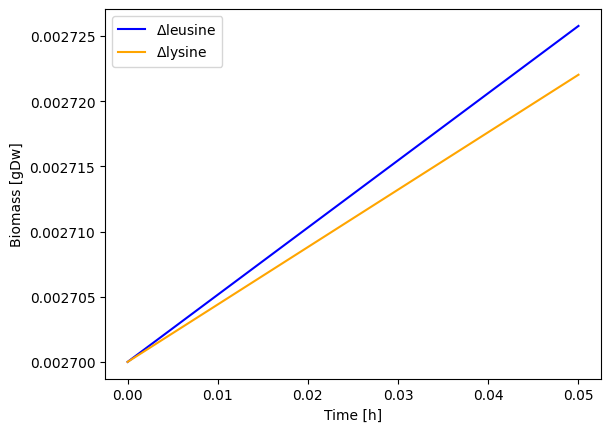

In [229]:
plt.plot(T, biomasses["dleu"], color="blue", label=r'$\Delta$leusine')
plt.plot(T, biomasses["dlys"], color="orange", label=r'$\Delta$lysine')

plt.xlabel("Time [h]")
plt.ylabel("Biomass [gDw]")
plt.legend()
plt.show()

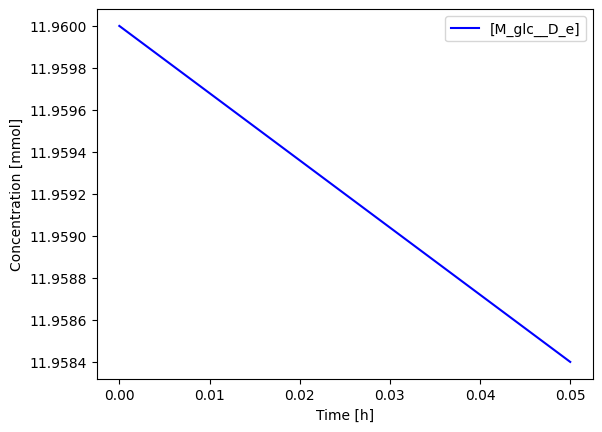

In [230]:
plt.plot(T, metabolites["M_glc__D_e"], color="blue", label="[M_glc__D_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

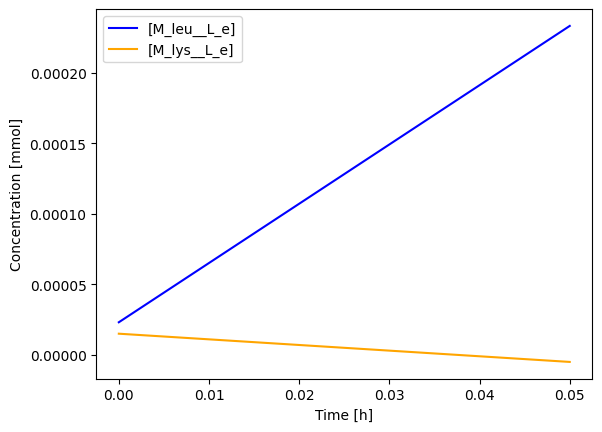

In [231]:
plt.plot(T, metabolites["M_leu__L_e"], color="blue", label="[M_leu__L_e]")
plt.plot(T, metabolites["M_lys__L_e"], color="orange", label="[M_lys__L_e]")
plt.xlabel("Time [h]")
plt.ylabel("Concentration [mmol]")
# Adding legend
plt.legend()
plt.show()

In [241]:

def plot_fluxes(T, mids, fluxes, biomasses, ids):
    n = 1
    for i, mid in enumerate(mids):
        ls = list(map(lambda d: d[ids[i]], fluxes[mid]))
        fls = [ls[t] /  v for t,v in enumerate(biomasses[mid][:-1])]
        plt.plot(T[1:len(ls)+1], fls, color=f"C{n+i}", label=f"[{ids[i]} {mid}")
        n+=2
    plt.xlabel("Time [h]")
    plt.ylabel(r'Flux [$mmol * gDw^{-1} * h^{-1}$]')
    plt.legend()


    plt.show()


In [244]:
print((fluxes["dleu"]))
print()

[{'R_ACGAM1PPpp': 0.0, 'R_2AGPA140tipp': 0.0, 'R_EX_acser_e': -0.0, 'R_2AGPA141tipp': 0.0, 'R_2AGPA160tipp': 0.0, 'R_3OAR180': 0.0, 'R_2AGPA161tipp': 0.0, 'R_3OAR181': 0.0, 'R_2AGPA180tipp': 0.0, 'R_3OAR40': 0.00018340965149833523, 'R_2AGPA181tipp': 0.0, 'R_3OAR60': 0.00018340965149833523, 'R_3OAR80': 0.00018340965149833523, 'R_3OAS100': 0.00018340965149833523, 'R_2AGPE120tipp': 0.0, 'R_3OAS120': 0.00010587907658157604, 'R_3OAS121': 7.753057491675919e-05, 'R_3OAS140': 0.00010587907658157604, 'R_12DGR120tipp': 0.0, 'R_12DGR140tipp': 0.0, 'R_3OAS141': 7.753057491675919e-05, 'R_12DGR141tipp': 0.0, 'R_2AGPE140tipp': 0.0, 'R_12DGR160tipp': 0.0, 'R_12DGR161tipp': 0.0, 'R_3OAS160': 6.577883240843507e-05, 'R_3OAS161': 7.753057491675916e-05, 'R_3OAS180': 0.0, 'R_3OAS181': 0.0, 'R_3OAS60': 0.00018340965149833523, 'R_3OAS80': 0.00018340965149833523, 'R_3PEPTabcpp': 0.0, 'R_3PEPTtex': 0.0, 'R_3UMPtex': 0.0, 'R_42A12BOOXpp': 0.0, 'R_4HOXPACDtex': 0.0, 'R_4HTHRS': 0.0, 'R_4PCP': 0.0, 'R_4PCPpp': 0.0

In [240]:
plot_fluxes(T,["dleu", "dlys"], fluxes, biomasses, ["R_LEUtex", "R_LEUtex"])

IndexError: list index out of range

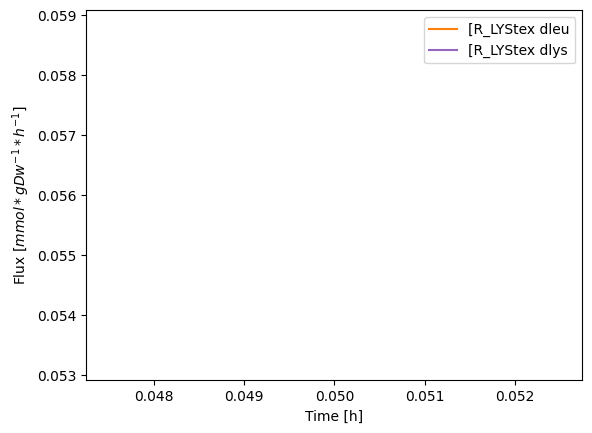

In [234]:
plot_fluxes(T,["dleu", "dlys"], fluxes, biomasses, ["R_LYStex", "R_LYStex"])

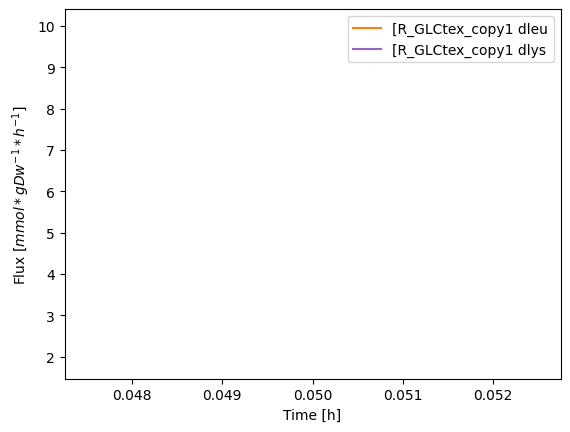

In [235]:
plot_fluxes(T,["dleu","dlys"], fluxes, biomasses, [ "R_GLCtex_copy1","R_GLCtex_copy1"])

In [168]:
for f in fluxes["dlys"]:
    if f:
        print(f["R_GLCtex_copy1"])

0.027000000000000003
